In [ ]:
import os
import glob
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

### 1) Mount Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/BeamNet10')

Mounted at /content/drive


### Uploading the data from drive -- time intensive if data not already uploaded previously 


##### Load the YAML data into tensors

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import yaml

import re


# This is code to make sure we pyyaml can read the yaml file with the proper headers
def meta_constructor(loader, node):
   return loader.construct_mapping(node)
yaml.add_constructor(u'tag:yaml.org,2002:opencv-matrix', meta_constructor)

def readYAMLFile(fileName):
    ret = {}
    skip_lines=1    # Skip the first line which says "%YAML:1.0". Or replace it with "%YAML 1.0"
    with open(fileName) as fin:
        for i in range(skip_lines):
            fin.readline()
        yamlFileOut = fin.read()
        myRe = re.compile(r":([^ ])")   # Add space after ":", if it doesn't exist. Python yaml requirement
        yamlFileOut = myRe.sub(r': \1', yamlFileOut)
        ret = yaml.load(yamlFileOut, Loader=yaml.Loader)
    return ret

In [ ]:
# Get class names and such 
folder_path = '/content/drive/MyDrive/BeamNet10/out_json'
class_list = os.listdir(folder_path)
print(class_list)

['front_aerial', 'back_handspring_so', 'split_jump', 'back_layout_so', 'side_aerial', 'full_turn', 'back_tuck', 'l_turn', 'sheep_jump', 'front_tuck']


In [ ]:
# Create one hot encoded class labels 
class_encoding = {}

for i, class_name in enumerate(class_list):
  template = np.zeros((len(class_list),))
  template[i] = 1
  class_encoding[class_name] = template

print(class_encoding)

{'front_aerial': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'back_handspring_so': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'split_jump': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'back_layout_so': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'side_aerial': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'full_turn': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'back_tuck': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 'l_turn': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'sheep_jump': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 'front_tuck': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}


In [ ]:
def breakcode():
  0 + [] - np.array([0,0,0])

In [ ]:
keypoint_sequences = []
classes = []
for c in tqdm(class_list):
  class_path = f'{folder_path}/{c}'

  # This should be a list of all the examples 1-100
  example_list = sorted(os.listdir(class_path))

  # Go through each folder, which contains the keypoint sequences in separate files
  print(f"WORKING CURRENTLY ON THIS CLASS {c}")
  for n in tqdm(example_list):
    sample_path = f'{class_path}/{n}'
    keypoint_files =sorted(os.listdir(sample_path))
    timestep_data = []
    for kp in keypoint_files:

      # Extract data from file 
      filepath = f'{sample_path}/{kp}'
      yaml_data = readYAMLFile(filepath)
      keypoint = yaml_data['pose_0']
      d = np.array(keypoint['data'])
      
      # If keypoints were not detected for timestep 
      if len(d) !=75:
        a = np.zeros((25, 3))
      # Reshape output which is in the format [x0,y0,c0,x1,y1,c1,...]
      # to be in the format [[x0, y0, c0], [x1, y1, c1],...]
      else:
        a = d.reshape((25,3))
      timestep_data.append(a)
      
    
    timestep_data = np.array(timestep_data)

    keypoint_sequences.append(timestep_data)
    classes.append(class_encoding[c])
      
    

  0%|          | 0/10 [00:00<?, ?it/s]

WORKING CURRENTLY ON THIS CLASS front_aerial



 10%|█         | 1/10 [17:49<2:40:22, 1069.14s/it]

WORKING CURRENTLY ON THIS CLASS back_handspring_so



 20%|██        | 2/10 [34:45<2:18:23, 1037.96s/it]

WORKING CURRENTLY ON THIS CLASS split_jump



 30%|███       | 3/10 [48:47<1:50:41, 948.80s/it] 

WORKING CURRENTLY ON THIS CLASS back_layout_so



 40%|████      | 4/10 [1:01:58<1:28:39, 886.51s/it]

WORKING CURRENTLY ON THIS CLASS side_aerial



 50%|█████     | 5/10 [1:21:11<1:21:52, 982.50s/it]

WORKING CURRENTLY ON THIS CLASS full_turn



 60%|██████    | 6/10 [1:37:51<1:05:53, 988.26s/it]

WORKING CURRENTLY ON THIS CLASS back_tuck



 70%|███████   | 7/10 [1:54:40<49:45, 995.01s/it]  

WORKING CURRENTLY ON THIS CLASS l_turn



 80%|████████  | 8/10 [2:11:06<33:04, 992.39s/it]

WORKING CURRENTLY ON THIS CLASS sheep_jump



 90%|█████████ | 9/10 [2:29:47<17:12, 1032.34s/it]

WORKING CURRENTLY ON THIS CLASS front_tuck



100%|██████████| 10/10 [2:47:43<00:00, 1006.31s/it]


In [ ]:
print(len(classes))
print(len(keypoint_sequences))

Streaming output truncated to the last 5000 lines.

       [[298.844788  , 151.664749  ,   0.91808039],
        [303.70929   , 163.255783  ,   0.82321024],
        [285.314331  , 159.402145  ,   0.8405326 ],
        ...,
        [297.909607  , 305.631348  ,   0.5695796 ],
        [293.047028  , 303.714264  ,   0.50860822],
        [298.910522  , 302.719696  ,   0.57049459]]]), array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.67819855e+02, 1.18686935e+02, 8.88124228e-01],
        [2.82409149e+02, 1.18695122e+02, 8.76211822e-01],
        ...,
        [2.69798584e+02, 2.83359985e+02, 2.86564469e-01],
        [2.74650452e+02, 2.82417206e+02, 2.05773160e-01],
        [2.81404602e+02, 2.88180176e+02, 6.43621445e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.66893219e+02, 1.18697845e+02, 8.84962678e-01],
        [2.81430176e+02, 1.18679665e+02, 8.44506860e-01],
        ...,
        [2.69791992e+02, 2.83366882e+02, 2.44243890e-01],
        [2.7

In [ ]:
# # Save outputs if i have to leave 

# import pickle

# with open('keypoint_sequences_ordered.txt', 'wb') as file:
#     pickle.dump(keypoint_sequences,file)  

FLAG: Start here if running project from github.

In [ ]:
# If you already have scraped the yaml files, then just load from drive

import pickle
file = open("keypoint_sequences_ordered.txt",'rb')
keypoint_sequences = pickle.load(file)
file.close()

In [ ]:
classes = []
for c in tqdm(class_list):
  class_path = f'{folder_path}/{c}'

  # This should be a list of all the examples 1-100
  example_list = os.listdir(class_path)

  # Go through each folder, which contains the keypoint sequences in separate files
  print(f"WORKING CURRENTLY ON THIS CLASS {c}")
  for n in tqdm(example_list):
    classes.append(class_encoding[c])

  0%|          | 0/10 [00:00<?, ?it/s]

WORKING CURRENTLY ON THIS CLASS front_aerial



100%|██████████| 100/100 [00:00<00:00, 515904.55it/s]


WORKING CURRENTLY ON THIS CLASS back_handspring_so



100%|██████████| 98/98 [00:00<00:00, 586364.90it/s]


WORKING CURRENTLY ON THIS CLASS split_jump



100%|██████████| 99/99 [00:00<00:00, 577518.91it/s]


WORKING CURRENTLY ON THIS CLASS back_layout_so



100%|██████████| 100/100 [00:00<00:00, 603496.98it/s]


WORKING CURRENTLY ON THIS CLASS side_aerial



100%|██████████| 100/100 [00:00<00:00, 487709.77it/s]


WORKING CURRENTLY ON THIS CLASS full_turn



100%|██████████| 99/99 [00:00<00:00, 544215.07it/s]


WORKING CURRENTLY ON THIS CLASS back_tuck



100%|██████████| 100/100 [00:00<00:00, 536356.01it/s]


WORKING CURRENTLY ON THIS CLASS l_turn



 80%|████████  | 8/10 [00:00<00:00, 78.58it/s]

WORKING CURRENTLY ON THIS CLASS sheep_jump



100%|██████████| 100/100 [00:00<00:00, 269903.73it/s]


WORKING CURRENTLY ON THIS CLASS front_tuck



100%|██████████| 10/10 [00:00<00:00, 80.62it/s]


In [ ]:
print(keypoint_sequences[0])

[[[1.32487000e+03 5.33215210e+02 8.99691343e-01]
  [1.33082507e+03 5.74543274e+02 9.41868424e-01]
  [1.30716760e+03 5.77394348e+02 8.74623001e-01]
  ...
  [1.26326416e+03 8.09809998e+02 7.64525533e-01]
  [1.26019714e+03 8.03965942e+02 7.85396099e-01]
  [1.28087659e+03 7.92312683e+02 6.87752247e-01]]

 [[1.32489502e+03 5.33212158e+02 9.04455006e-01]
  [1.33074048e+03 5.77267700e+02 9.34216440e-01]
  [1.30446143e+03 5.77433594e+02 8.72576654e-01]
  ...
  [1.26325598e+03 8.15867615e+02 8.09950292e-01]
  [1.26016003e+03 8.09998535e+02 8.69913995e-01]
  [1.28968372e+03 8.06876709e+02 7.11530507e-01]]

 [[1.32486206e+03 5.33257935e+02 8.90661299e-01]
  [1.33070959e+03 5.77292236e+02 9.31445181e-01]
  [1.30445093e+03 5.77447205e+02 8.67511928e-01]
  ...
  [1.27196667e+03 8.24561157e+02 7.86151767e-01]
  [1.26028564e+03 8.12957642e+02 8.52414668e-01]
  [1.28962000e+03 8.09959961e+02 7.24383235e-01]]

 ...

 [[1.12198352e+03 4.68460236e+02 8.65192294e-01]
  [1.13937488e+03 5.03729065e+02 8.9461

In [ ]:
# print(test_whatsthis - keypoint_sequences)

for i in range(len(keypoint_sequences_loaded)):
  print((keypoint_sequences_loaded[i]==keypoint_sequences[i]).all())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


### Format the Data

Split positional and confidence data

OpenPose outputs body part locations (x, y) and detection confidence (c). Confidence is in a range from 0 to 1. We want to separate the spatial data from the confidence values. 

In [ ]:
del keypoint_sequences_xy
del confidence_scores

In [ ]:
print(keypoint_sequences[0])

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [9.92372070e+02 5.06844452e+02 8.52636099e-01]
  [1.01593683e+03 5.09671570e+02 7.87211359e-01]
  ...
  [1.00999060e+03 8.39410645e+02 4.21853960e-01]
  [1.00134723e+03 8.42306580e+02 4.55501467e-01]
  [9.74652832e+02 8.36510681e+02 7.25395024e-01]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [9.92405457e+02 5.06822632e+02 8.56556594e-01]
  [1.01883112e+03 5.06870941e+02 8.10254514e-01]
  ...
  [1.00706812e+03 8.39394897e+02 4.34734136e-01]
  [1.00128491e+03 8.42272034e+02 4.72719193e-01]
  [9.74645630e+02 8.36453613e+02 7.25291014e-01]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [9.92374146e+02 5.06769135e+02 8.66924167e-01]
  [1.01886682e+03 5.06837616e+02 8.36869061e-01]
  ...
  [1.00711218e+03 8.42239014e+02 4.48773593e-01]
  [1.00129510e+03 8.42334045e+02 4.80235368e-01]
  [9.74645996e+02 8.36454346e+02 7.22156167e-01]]

 ...

 [[1.32773425e+03 5.59708496e+02 2.95326442e-01]
  [1.29852002e+03 5.83289612e+02 8.7068

In [ ]:
import copy 

# This commented code is if you want to weight the sequences
# weighted_keypoint_sequences = copy.deepcopy(keypoint_sequences)

# for i, sequence in enumerate(keypoint_sequences):
#     # If the sequence is empty 
#     # if sequence.ndim <= 1:
#     #   # Give the sequence an arbitrary value 
#     #   weighted_keypoint_sequences[i] = np.zeros((10, 50))
#     # else:
#     confidence_scores = sequence[:,:, 2]
#     weighted_sequence =  sequence[:, :, :2] *confidence_scores[:, :, None]
#     # Flatten each set of x and y coordinate into one row 
#     weighted_sequence = weighted_sequence.reshape((weighted_sequence.shape[0], weighted_sequence.shape[1]*weighted_sequence.shape[2]))
#     weighted_keypoint_sequences[i] = weighted_sequence

# Each example now has shape (num_frames, num_keypoints, 2) -- 2 for x and y. 
# keypoint_sequences_xy = weighted_keypoint_sequences

# Extract confidence weights and x and y coordinates 
confidence_scores = copy.deepcopy(keypoint_sequences) ## Has shape (num_examples, num_frames_for_example, num_keypoints) -- num_keypoints = 25
keypoint_sequences_xy = copy.deepcopy(keypoint_sequences) ## Has shape (num_examples, num_frames_for_example, num_keypoints, 2) -- num_keypoints = 25

for i, sequence in enumerate(keypoint_sequences):
  # print(sequence[:, :, 2])
  confidence_scores[i] = sequence[:, :, 2]
  keypoint_sequences_xy[i] = sequence[:, :, :2].reshape((sequence.shape[0], sequence.shape[1]*2)) # Flatten x and y coordinates

# Want to duplicate the confidence scores for both x and y 
# confidence_scores = np.repeat(confidence_scores[:, np.newaxis], repeats=2, axis=1)
# print(confidence_scores[0].shape)


print(keypoint_sequences_xy[0])




[[1324.87      533.21521  1330.82507  ...  803.965942 1280.87659
   792.312683]
 [1324.89502   533.212158 1330.74048  ...  809.998535 1289.68372
   806.876709]
 [1324.86206   533.257935 1330.70959  ...  812.957642 1289.62
   809.959961]
 ...
 [1121.98352   468.460236 1139.37488  ...  745.243652 1018.79834
   756.950623]
 [1115.85986   471.370667 1121.86292  ...  745.202637 1004.20782
   762.828308]
 [1098.35461   477.238586 1116.0061   ...  745.152771 1001.32166
   751.074524]]


In [ ]:
print(len(keypoint_sequences_xy))

994


###### trash -- ignore

In [ ]:
# I don't think I should do this .. 
# import copy 
# # add 2 to backhadnspring so 

# # add 1 to split jump

# # add 1 to full_turn

# classes.append(class_encoding["back_handspring_so"])
# classes.append(class_encoding["back_handspring_so"])

# classes.append(class_encoding["split_jump"])

# classes.append(class_encoding["full_turn"])

# examples_supplemented = copy.deepcopy(examples)
# for _ in range(4):
#   examples_supplemented.append(np.zeros((2, 75)))

In [ ]:

# Need to add two more because 7 and 11 are empty for back_handspring_so
# examples_supplemented = examples

# examples_supplemented.append(np.zeros((2, 1, 25)))
# examples_supplemented.append(np.zeros((2, 1, 25)))

# classes.append(class_encoding["back_handspring_so"])
# classes.append(class_encoding["back_handspring_so"])

# examples_supplemented.append(np.zeros((2, 1, 25)))
# classes.append(class_encoding["split_jump"])

# examples_reshaped = examples_supplemented

# for i, e in enumerate(examples_supplemented):
#   e = np.array(e)
#   if e.ndim <= 1:
#     # print(e.shape)
#     # print(e)
#     print(i)
#     examples_reshaped[i] = np.zeros((2, 25))
#     print(classes[i])
#   else: 
#     # print(e.shape)
#     examples_reshaped[i] = e.reshape(e.shape[0], 25)

# print(len(examples_reshaped))
# print(len(classes))


ValueError: ignored

###### Pad data to be same shape

Get the sequence with the largest number of timesteps, and pad the data to fit this. 

In [ ]:
del max

NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(keypoint_sequences_xy[0].shape)
largest_keypoint_sequence = max(keypoint_sequences_xy, key=lambda arr: arr.shape[0])

max_sequence_length = largest_keypoint_sequence.shape[0]

# print(largest_keypoint_sequence)

print(largest_keypoint_sequence.shape)
# print(largest_keypoint_sequence)

print(max_sequence_length)


# X = np.array(largest_keypoint_sequence)


# # Pad all sequences to have same size aslargest sequence
X = pad_sequences(keypoint_sequences_xy, maxlen=max_sequence_length, dtype='float32', padding='post')
y = np.array(classes)

print(y.shape)

(61, 50)
(281, 50)
281
(994, 10)


In [ ]:
print(X.shape)

(994, 281, 75)


Normalization Step 

Normalize each keypoint across the whole sequence -- minmax normalization

In [ ]:
# Normalize X -- minmax normalization

for i in range(X.shape[0]):
  sequence = X[i]

  # Get min and max for each timestep
  min_values = np.min(sequence, axis=0)
  max_values = np.max(sequence, axis=0)

  if np.all(min_values == 0) and np.all(max_values == 0):
      continue

  for j in range(len(min_values)):
    if (max_values[j] - min_values[j]) == 0:
      continue
    sequence[:, j] = (sequence[:, j] - min_values[j]) / (max_values[j] - min_values[j])

  X[i] = sequence


print(X[0][0].shape)


(50,)


OR Normalize each timestep of the sequence

In [ ]:
# Normalize X -- minmax normalization

for i in range(X.shape[0]):
  sequence = X[i]

  min_values = np.min(sequence, axis=1)
  max_values = np.max(sequence, axis=1)

  if np.all(min_values == 0) and np.all(max_values == 0):
      continue

  for j in range(len(min_values)):
    if (max_values[j] - min_values[j]) == 0:
      continue
    sequence[j, :] = (sequence[j, :] - min_values[j]) / (max_values[j] - min_values[j])

  X[i] = sequence


print(X[0][0].shape)


(50,)


In [ ]:
print(X.shape)
print(isinstance(X, np.ndarray))

(994, 281, 50)
True


Reshape the labels to broadcast them to each timestep

In [ ]:
# Reshape y -- only necessary to do once. 
if not y.shape == (994, 281, 10):
  num_examples = y.shape[0]
  num_classes = 10
  expanded = y[:, np.newaxis, :] 
  y = np.broadcast_to(expanded, (num_examples, max_sequence_length, num_classes)) 
print(y.shape)

(994, 281, 10)


Split up the test and train sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(f"X train size {X_train.shape} \n X test size {X_test.shape} \n y train size {y_train.shape} \n y test size {y_test.shape}")

X train size (795, 281, 50) 
 X test size (199, 281, 50) 
 y train size (795, 281, 10) 
 y test size (199, 281, 10)


In [ ]:
import numpy as np

# Assuming your dataset is stored in a variable called 'data'
has_nan = np.isnan(X).any()

if has_nan:
    print("Dataset contains NaN values.")
else:
    print("Dataset does not contain NaN values.")

Dataset does not contain NaN values.


### Building the Model

#### I will be building two models:


*   A Vanilla LSTM Model
*   A model with using an attention mechanism 

And i will compare the performance of the two 



##### Vanilla RNN using LSTM  (no attention)

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow as tf

# # HYPERPARAMETERS
# # Data 
# batch_size = 80
# auto = tf.data.AUTOTUNE # I don't know what this is 
# num_timesteps = max_sequence_length
# num_features = 75 # 25 x and 25 y 
# in_dim = (num_timesteps, num_features) # (num_frames, keypoints_per_frame, dimensions)
# num_classes = 10

# # Optimizer
# lr = .001
# weight_decay = .0004 # I don't know what thi s is

# # Training
# num_epochs = 20
# LSTM_units = 64
# dropout_rate = 0.2
# fc_units = 128


# # MODEL LAYERS 

# in_layer = layers.Input(shape=in_dim)

# LSTM_layer_1 = layers.LSTM(LSTM_units, return_sequences=True)(in_layer)

# batchnorm_layer = layers.BatchNormalization()(LSTM_layer_1)

# LSTM_layer_2 = layers.LSTM(LSTM_units, return_sequences=True)(batchnorm_layer)

# # To prevent overfitting
# dropout_layer = layers.Dropout(rate=dropout_rate)(LSTM_layer_2)

# # Nonlinear layer 
# fc_layer = layers.Dense(fc_units, activation='linear')(dropout_layer)


# out_layer = layers.Dense(num_classes, activation='softmax')(fc_layer)

# # Create and compile model
# rnn = keras.Model(inputs=in_layer, outputs=out_layer)

# optimizer = keras.optimizers.Adam(lr=lr, epsilon=1e-8)

# rnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', 'AUC', 'categorical_accuracy'])
# # rnn.summary()

# # model = keras.Sequential()
# # model.add(layers.LSTM(128, input_shape=in_dim, return_sequences=True))
# # model.add(layers.Dropout(0.2))
# # model.add(layers.LSTM(64, return_sequences=True))
# # model.add(layers.Dropout(0.2))
# # model.add(layers.Dropout(0.2))
# # model.add(layers.LSTM(32))
# # model.add(layers.Dropout(0.2))
# # model.add(layers.Dense(64, activation='relu'))
# # model.add(layers.Dense(num_classes, activation='softmax'))

# # # Compile the model
# # model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # # Print the model summary
# # model.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, 281, 128)          104448    
                                                                 
 dropout_56 (Dropout)        (None, 281, 128)          0         
                                                                 
 lstm_81 (LSTM)              (None, 281, 64)           49408     
                                                                 
 dropout_57 (Dropout)        (None, 281, 64)           0         
                                                                 
 dropout_58 (Dropout)        (None, 281, 64)           0         
                                                                 
 lstm_82 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_59 (Dropout)        (None, 32)              

In [ ]:
del model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

num_classes = 10
num_epochs = 100
batch_size = 120
# Input layer
in_dim = (X.shape[1], X.shape[2])
# input_layer = layers.Input(shape=(None, input_dimension)) 
input_layer = layers.Input(shape=(in_dim)) 


# LSTM layer
lstm_layer = layers.LSTM(64, return_sequences=True)(input_layer)

# Attention layer 1
attention = layers.Attention()([lstm_layer, lstm_layer])

dropout_layer = layers.Dropout(rate=0.2)(attention)

# Attention layer 2
attention_2 = layers.Attention()([dropout_layer, dropout_layer])

# Dropout 
dropout_layer_2 = layers.Dropout(rate=0.2)(attention_2)


# Fully connected layer
fc_layer = layers.Dense(128, activation='relu')(dropout_layer_2)

# Output layer
output_layer = layers.Dense(num_classes, activation='softmax')(fc_layer) 

# Create the model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 281, 50)]    0           []                               
                                                                                                  
 lstm_1 (LSTM)                  (None, 281, 64)      29440       ['input_2[0][0]']                
                                                                                                  
 attention_2 (Attention)        (None, 281, 64)      0           ['lstm_1[0][0]',                 
                                                                  'lstm_1[0][0]']                 
                                                                                                  
 dropout_2 (Dropout)            (None, 281, 64)      0           ['attention_2[0][0]']      

Train the model and store loss over time

In [ ]:
losses = []

# Training loop
for epoch in range(num_epochs):
    # train model for one epoch
    round = model.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=1, verbose=1)
    
    # loss 
    loss = round.history['loss'][0]
    losses.append(loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {loss}")

6/6 [==============================] - 13s 2s/step - loss: 2.3013 - accuracy: 0.1025 - val_loss: 2.2940 - val_accuracy: 0.0692
Epoch 1/100 - Loss: 2.3013439178466797
6/6 [==============================] - 8s 1s/step - loss: 2.2797 - accuracy: 0.1032 - val_loss: 2.2797 - val_accuracy: 0.1258
Epoch 2/100 - Loss: 2.279705047607422
6/6 [==============================] - 8s 1s/step - loss: 2.2677 - accuracy: 0.1251 - val_loss: 2.2818 - val_accuracy: 0.1213
Epoch 3/100 - Loss: 2.2677223682403564
6/6 [==============================] - 10s 2s/step - loss: 2.2648 - accuracy: 0.1237 - val_loss: 2.2727 - val_accuracy: 0.1195
Epoch 4/100 - Loss: 2.2648439407348633
6/6 [==============================] - 7s 1s/step - loss: 2.2382 - accuracy: 0.1573 - val_loss: 2.2284 - val_accuracy: 0.1686
Epoch 5/100 - Loss: 2.238192081451416
6/6 [==============================] - 7s 1s/step - loss: 2.2065 - accuracy: 0.1819 - val_loss: 2.1749 - val_accuracy: 0.1621
Epoch 6/100 - Loss: 2.206475257873535
6/6 [======

In [ ]:
print(classes)

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 

Run trained model on test set and extract class predictions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

y_hat = model.predict(X_test) # shape (num_examples, timesteps, num_classes)



# WAS considering doing womething with the confidences
# Like we could average all 25 confidences across each timestep and multiply the timestep by that 
# confidence = np.sum(confidence_scores[i], axis=2)/confidence_scores.shape[2] # Now has shape (num_examples, max_timesteps)
# weighted_y_hat = np.einsum('ijk, ij->ijk', y_hat, confidence)





# I want to sum and average all of the predictions across the timesteps for each class so that the shape is (500, 10)
# Want to do average pooling of predictions across each sequence 
y_hat = np.sum(y_hat, axis=1)/y_hat.shape[1]
print(y_hat.shape)


y_hat = y_hat.argmax(axis=1)
gt = y_test[:, 0, :]
gt = gt.argmax(axis=1)

7/7 [==============================] - 1s 99ms/step
(199, 10)


### Data Visualization 
We will visualize the loss and heatmap for each model 

In [ ]:
del heatmap

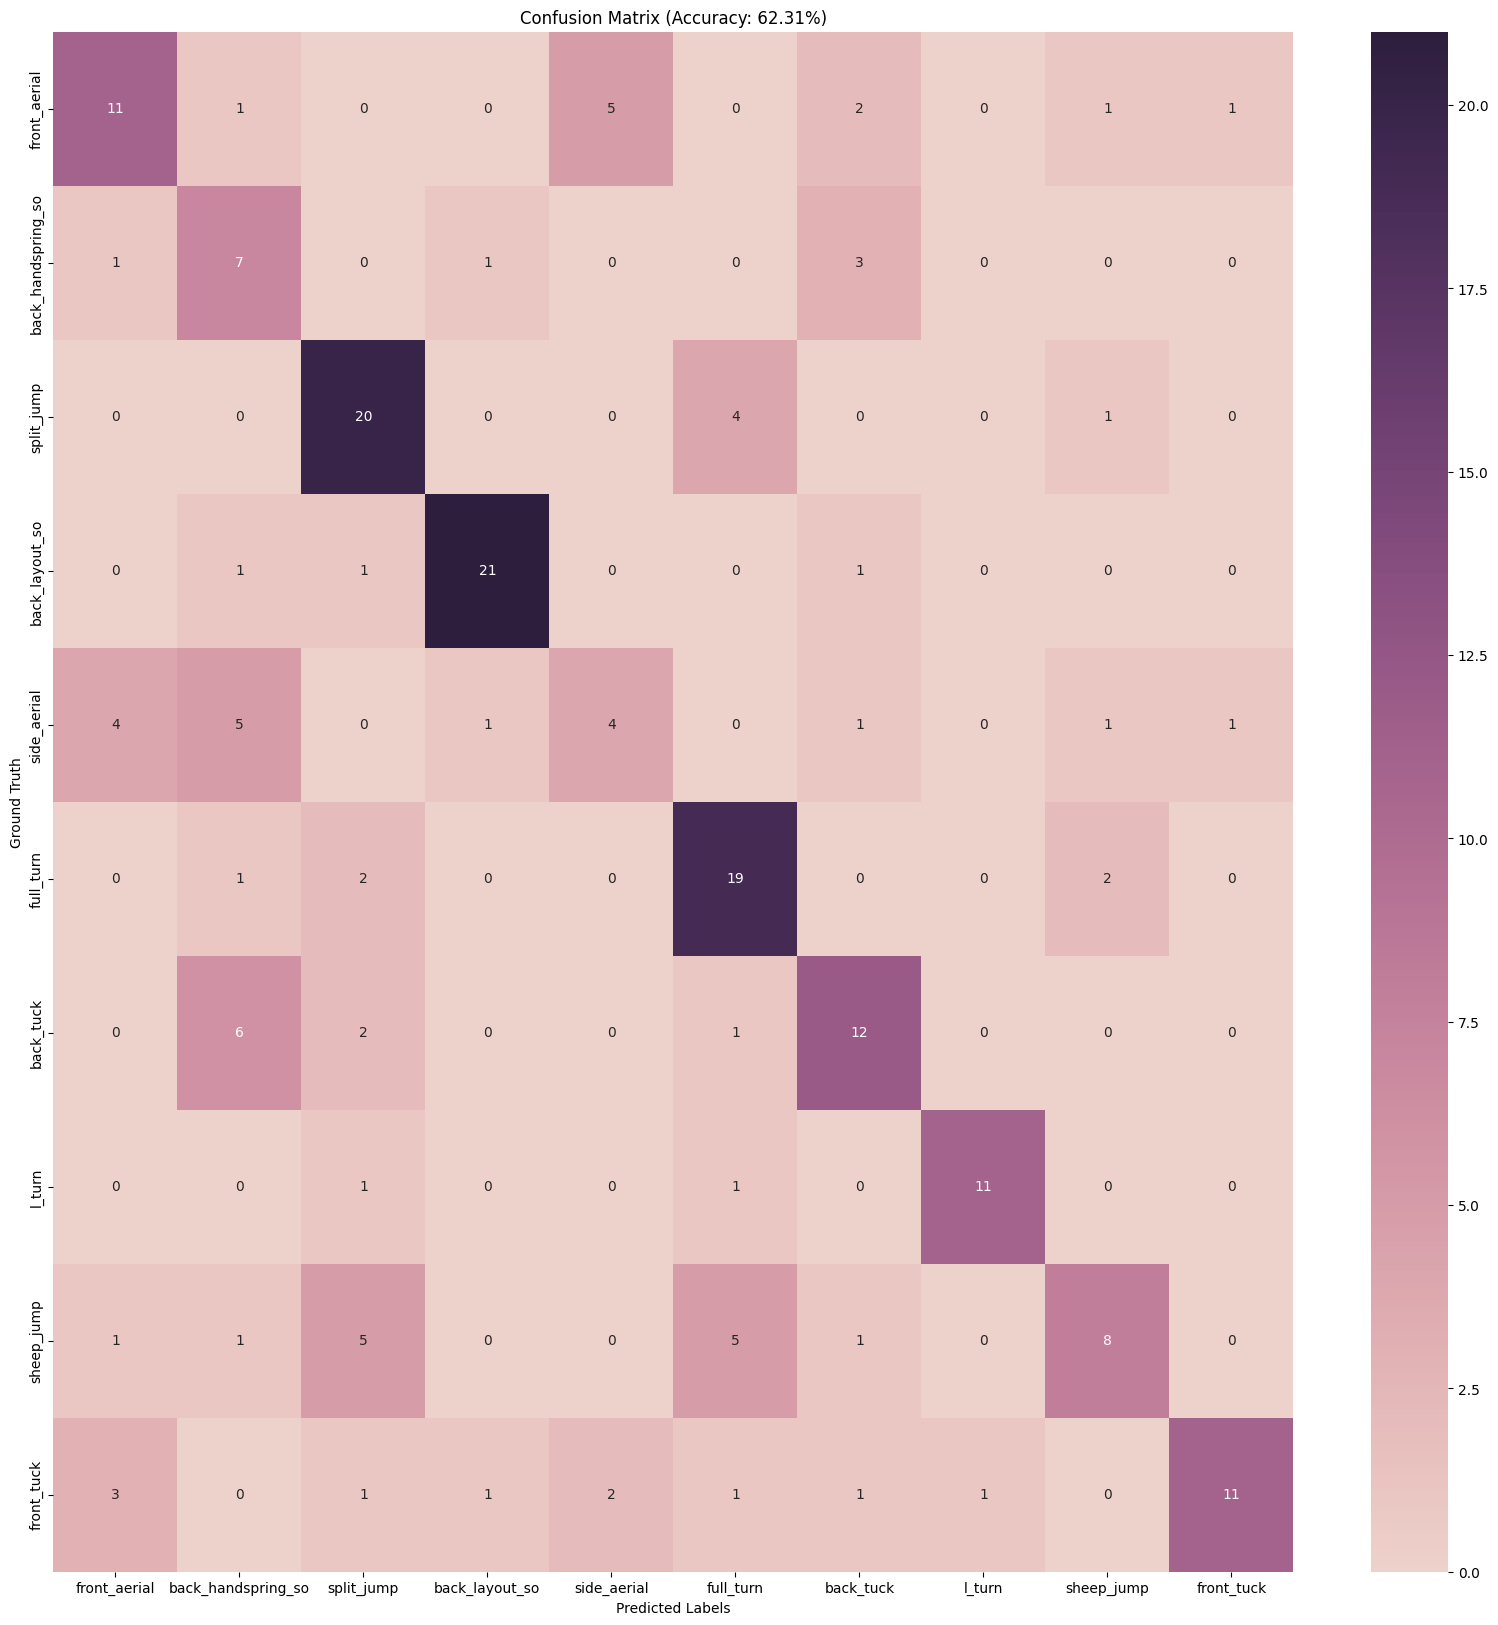

In [ ]:
import matplotlib.pyplot as plt

classification_accuracy = accuracy_score(gt, y_hat)
heatmap = confusion_matrix(gt, y_hat)

# Create a heatmap of classification accuracy
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='d')
plt.xlabel('Predicted Labels')
plt.xticks(np.arange(10)+0.5, class_list)
plt.ylabel('Ground Truth')
plt.yticks(np.arange(10)+0.5, class_list)
plt.title('Confusion Matrix (Accuracy: {:.2f}%)'.format(classification_accuracy * 100))

# num_rows, num_cols = heatmap.shape

# # Set the x-axis and y-axis tick positions
# plt.xticks(np.arange(num_cols) - 0.5, class_list)
# plt.yticks(np.arange(num_rows) - 0.5, class_list)

# # Set the tick labels to be centered within the heatmap square
# plt.tick_params(axis='x', pad=num_cols / 2)
# plt.tick_params(axis='y', pad=num_rows/2)

plt.show()

Visualizing loss over epochs for the vanilla RNN

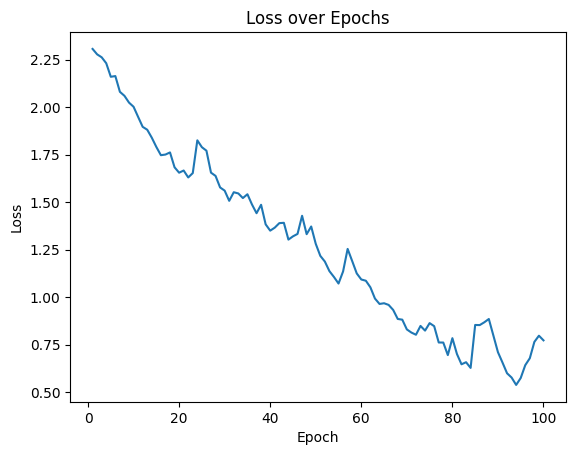

In [ ]:
# Plotting the loss over epochs
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

Classificaiton accuracy heatmap for 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf


# comparing the LSTM model vs the attention model 

model=Sequential()
model.add(LSTM(2**LSTM_units,input_length=data.shape[1],input_dim=data.shape[2],return_sequences=True))
model.add(Dropout(dropout))
model.add(Dense(1))
model.fit(data,res)
prediction=model.predict(test)


num_classes = 10
LSTM_units = 64



# Input layer
in_dim = (X.shape[1], X.shape[2])
# input_layer = layers.Input(shape=(None, input_dimension)) 
input_layer = layers.Input(shape=(in_dim)) 


# LSTM layer
lstm_layer = layers.LSTM(64, return_sequences=True)(input_layer)

# Attention layer
attention = layers.Attention()([lstm_layer, lstm_layer])


# Fully connected layer
fc_layer = layers.Dense(128, activation='relu')(attention)

# Output layer
output_layer = layers.Dense(num_classes, activation='softmax')(fc_layer) 

# Create the model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 270, 25)]    0           []                               
                                                                                                  
 lstm_4 (LSTM)                  (None, 270, 64)      23040       ['input_5[0][0]']                
                                                                                                  
 attention_2 (Attention)        (None, 270, 64)      0           ['lstm_4[0][0]',                 
                                                                  'lstm_4[0][0]']                 
                                                                                                  
 dense_2 (Dense)                (None, 270, 128)     8320        ['attention_2[0][0]']      

##### Split up test and train set and then train model

In [ ]:
from sklearn.model_selection import train_test_split

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=16)




In [ ]:
num_epochs = 10
losses = []

# Training loop
for epoch in range(num_epochs):
    # train model for one epoch
    round = model.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=1, verbose=1)
    
    # loss 
    loss = round.history['loss'][0]
    losses.append(loss)
    
    # Print the loss for this epoch
    print(f"Epoch {num_epochs+1}/{num_epochs} - Loss: {loss}")

In [ ]:
# Plotting the loss over epochs
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

In [ ]:
# num_epochs = 100
# batch_size = 80 #64 training data per 5 classes, 320 total 
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
4/4 [==============================] - 3s 902ms/step - loss: 0.9403 - accuracy: 0.6343 - val_loss: 1.2444 - val_accuracy: 0.4739
Epoch 2/100
4/4 [==============================] - 2s 517ms/step - loss: 0.9382 - accuracy: 0.6623 - val_loss: 1.1941 - val_accuracy: 0.4906
Epoch 3/100
4/4 [==============================] - 2s 547ms/step - loss: 0.9362 - accuracy: 0.6623 - val_loss: 1.1636 - val_accuracy: 0.5014
Epoch 4/100
4/4 [==============================] - 2s 512ms/step - loss: 0.9182 - accuracy: 0.6454 - val_loss: 1.2269 - val_accuracy: 0.4633
Epoch 5/100
4/4 [==============================] - 2s 558ms/step - loss: 0.9169 - accuracy: 0.6584 - val_loss: 1.2610 - val_accuracy: 0.4416
Epoch 6/100
4/4 [==============================] - 2s 657ms/step - loss: 0.9226 - accuracy: 0.6811 - val_loss: 1.2190 - val_accuracy: 0.4576
Epoch 7/100
4/4 [==============================] - 3s 868ms/step - loss: 0.9325 - accuracy: 0.6412 - val_loss: 1.1992 - val_accuracy: 0.5137
Epoch 8/100
4

##### Save the trained model in drive

In [ ]:
model.save('/content/drive/MyDrive/BeamNet10/models/beamNet_1.h5')

##### Run the model on test set and analyze results

I got this code from chatGPT, using the query "how do i output a heatmap of classification accuracy?"

4/4 [==============================] - 1s 146ms/step
[0 2 0 1 1 0 0 1 2 4 2 1 4 2 0 0 4 2 0 4 4 4 3 0 2 4 1 3 1 0 4 0 4 1 2 0 4
 2 3 2 0 2 4 1 2 2 2 2 4 2 2 1 1 4 1 2 1 2 3 2 4 3 0 4 2 2 4 2 3 0 0 0 3 3
 0 0 3 2 4 4 1 2 4 1 0 2 1 4 0 3 0 4 0 0 4 0 2 2 4 2]
[1 1 0 1 1 1 0 1 4 4 1 1 4 1 0 0 4 0 3 4 2 2 3 1 1 2 0 3 1 0 4 0 0 0 2 4 0
 0 3 4 0 4 2 1 4 0 2 4 1 3 1 1 2 4 4 4 3 1 3 3 4 3 0 2 4 2 0 1 3 2 0 0 3 3
 0 2 3 4 4 1 3 2 4 1 0 4 1 1 0 3 0 4 1 4 2 4 2 0 0 2]


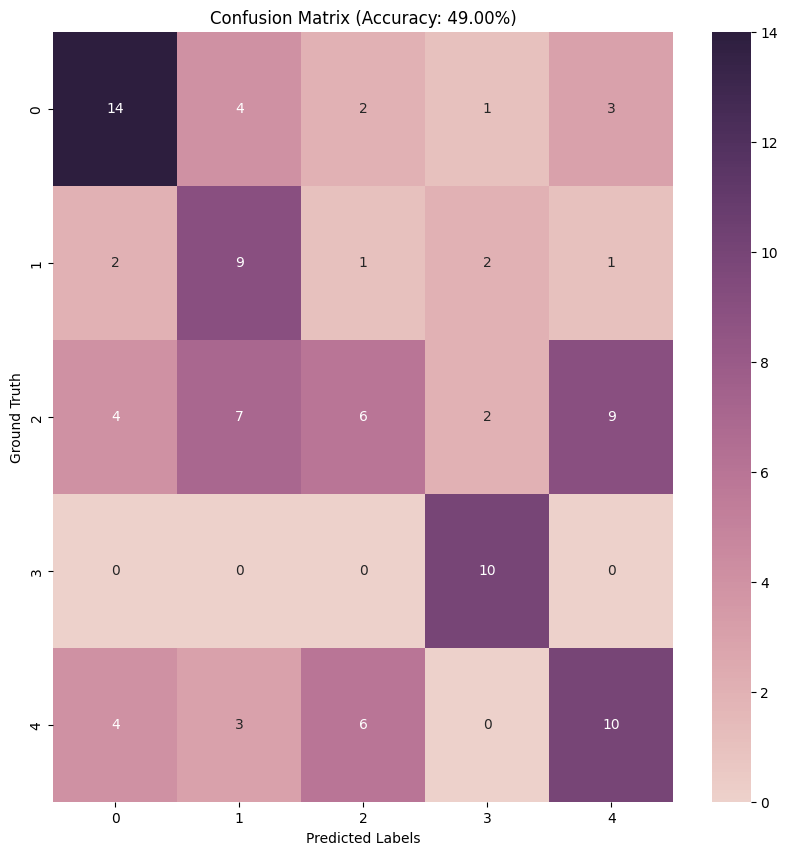

100%|██████████| 100/100 [00:00<00:00, 133.10it/s]

(100, 5)
(100, 5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

class_predictions = model.predict(X_test)

class_preds = np.sum(class_predictions, axis=1)/270
try_hat = class_preds.argmax(axis=1)
gt = y_test[:, 0, :]
gt = gt.argmax(axis=1)

print(gt)
print(try_hat)


classification_accuracy = accuracy_score(gt, try_hat)
heatmap = confusion_matrix(gt, try_hat)

# Create a heatmap of classification accuracy
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix (Accuracy: {:.2f}%)'.format(classification_accuracy * 100))
plt.show()

y_hat_expanded = []
for example in tqdm(class_predictions): 
  e = []
  # Going through the 270 rows 
  for row in example:

    max_index = np.argmax(row, axis=0)
    one_hot = np.eye(row.shape[0])[max_index]
    # print(one_hot)
    e.append(one_hot)
  
  y_hat_expanded.append(e)

y_hat_expanded = np.array(y_hat_expanded)
y_hat_sum = np.sum(y_hat_expanded, axis=1)

y_hat = []
for row in y_hat_sum: 
  max_index = np.argmax(row, axis=0)
  one_hot = np.eye(row.shape[0])[max_index]
  y_hat.append(one_hot)



y_hat = np.array(y_hat)
# print(y_hat)


# y_hat = np.argmax(class_predictions, axis=1)
ground_truth = y_test[:, 0, :]

print(ground_truth.shape)
print(y_hat.shape)

# classification_accuracy = accuracy_score(ground_truth, y_hat)
# heatmap = confusion_matrix(ground_truth, y_hat)

# # Create a heatmap of classification accuracy
# plt.figure(figsize=(10, 10))
# sns.heatmap(heatmap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='d')
# plt.xlabel('Predicted Labels')
# plt.ylabel('Ground Truth')
# plt.title('Confusion Matrix (Accuracy: {:.2f}%)'.format(classification_accuracy * 100))
# plt.show()


